In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
# from tensorflow.python.keras.layers import Dense
# from tensorflow.python.keras import Sequential
import numpy as np
from keras import regularizers

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
print(tf.__version__)

C:\Users\Ayushi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


1.13.1


In [2]:
ERP = pd.read_csv('C:/Users/Ayushi/Downloads/final_schizo (1).csv')

In [3]:
ERP

,Unnamed: 0,subject,Fz,FCz,Cz,FC3,FC4,C3,C4,CP3,CP4,group
0,0,1,1.857458,2.663352,3.051918,1.789011,1.961065,4.949901,2.282836,4.664762,3.425792,0
1,1,1,1.769692,2.601734,3.005648,1.868428,1.774454,5.024462,2.194537,4.737277,3.272531,0
2,2,1,1.764793,2.542194,3.002812,1.873400,1.800019,4.957654,2.152802,4.700508,3.171712,0
3,3,1,1.884980,2.632460,3.198821,1.987578,2.028194,5.091695,2.337921,4.914420,3.385077,0
4,4,1,1.591516,2.369464,2.965318,1.868979,1.853117,4.894329,2.262968,4.730303,3.335385,0
5,5,1,1.266414,2.104668,2.564897,1.636836,1.558187,4.617213,2.026006,4.353926,3.043253,0
6,6,1,1.033544,1.898855,2.454061,1.523382,1.461665,4.552207,1.966293,4.269848,2.974695,0
7,7,1,0.682681,1.545434,2.132746,1.272692,1.124023,4.228364,1.667147,3.925100,2.645537,0
8,8,1,0.380175,1.312452,1.895974,1.127405,0.828367,3.851467,1.407963,3.573139,2.342426,0
9,9,1,0.376265,1.300627,1.948255,1.052041,0.842131,3.912389,1.439868,3.533974,2.390666,0


The number of trials for the fit class is: 98304
The number of trials for the schizoprenic class is: 150528


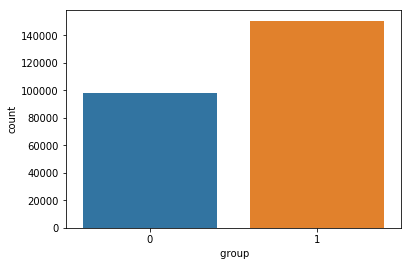

In [4]:
cols = ERP.columns
tgt = ERP[' group']
ax = sn.countplot(tgt,label="Count")
schizoprenic, fit = tgt.value_counts()
print('The number of trials for the fit class is:', fit)
print('The number of trials for the schizoprenic class is:', schizoprenic)

In [5]:
ERP.isnull().sum()

Unnamed: 0    0
subject       0
Fz            0
FCz           0
Cz            0
FC3           0
FC4           0
C3            0
C4            0
CP3           0
CP4           0
 group        0
dtype: int64

In [6]:
ERP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248832 entries, 0 to 248831
Data columns (total 12 columns):
Unnamed: 0    248832 non-null int64
subject       248832 non-null int64
Fz            248832 non-null float64
FCz           248832 non-null float64
Cz            248832 non-null float64
FC3           248832 non-null float64
FC4           248832 non-null float64
C3            248832 non-null float64
C4            248832 non-null float64
CP3           248832 non-null float64
CP4           248832 non-null float64
 group        248832 non-null int64
dtypes: float64(9), int64(3)
memory usage: 22.8 MB


In [7]:
X = ERP.iloc[:,1:11].values
X.shape

(248832, 10)

In [8]:
y = ERP.iloc[:,11].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
X_train[0]

array([-0.51325079,  0.23213767,  0.35794923,  0.90294288,  0.58165777,
        0.43496066,  1.04660585,  0.90332166,  1.4758551 ,  1.08372391])

In [12]:
classifier = keras.Sequential()

In [13]:
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)

In [14]:
classifier.add(keras.layers.Dense(12, activation = 'relu', input_dim = 10))
classifier.add(keras.layers.Dense(8,  activation = 'relu'))
classifier.add(keras.layers.Dense(1 ,activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])




In [15]:
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 40)

Epoch 1/40
199065/199065 [==============================] - 83s 417us/sample - loss: 0.1070 - acc: 0.9595
Epoch 2/40
199065/199065 [==============================] - 75s 376us/sample - loss: 0.0082 - acc: 0.9984
Epoch 3/40
199065/199065 [==============================] - 78s 390us/sample - loss: 0.0044 - acc: 0.9991
Epoch 4/40
199065/199065 [==============================] - 80s 401us/sample - loss: 0.0037 - acc: 0.9991
Epoch 5/40
199065/199065 [==============================] - 78s 392us/sample - loss: 0.0030 - acc: 0.9993
Epoch 6/40
199065/199065 [==============================] - 87s 435us/sample - loss: 0.0024 - acc: 0.9995
Epoch 7/40
199065/199065 [==============================] - 83s 419us/sample - loss: 0.0020 - acc: 0.9996
Epoch 8/40
199065/199065 [==============================] - 80s 403us/sample - loss: 0.0024 - acc: 0.9995
Epoch 9/40
199065/199065 [==============================] - 82s 412us/sample - loss: 0.0017 - acc: 0.9997 - loss: 0.0017 - acc: 0.9
Epoch 10/40
199065/1

In [16]:
# y_pred = classifier.predict(X_test, verbose =0)
# y_pred = (y_pred > 0.5)
yhat_probs = classifier.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = classifier.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000
Cohens kappa: 1.000000
ROC AUC: 1.000000
[[19621     0]
 [    0 30146]]
